In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import spectral_clustering
from rdkit.Chem import Crippen as logp
from rdkit.Chem import rdMolDescriptors as tpsa
from rdkit.Chem import QED as QED
import matplotlib as mpl
from matplotlib import rc, rcParams

In [2]:
plt.rcParams["font.family"] = "Arial"

plt.rcParams['ps.useafm'] = True
plt.rcParams['pdf.fonttype'] = 42

mpl.font_manager.FontManager()


# make the numbers on axis bold
rc('font', weight='bold')

In [3]:
# data reading
data = pd.read_csv ('Features_gap_pubchemqc.csv')

gen_data = pd.read_csv ('FeaturesInitial_training.csv')
"""for c in data.columns[:-1]:
    print('Variance of column {}: {}'.format(c, np.var(data[c])))
"""

#data.drop('NumRadicalElectrons', axis = 1, inplace = True)
#data.drop('NumAromaticCarbocycles', axis = 1, inplace = True)

#gen_data.drop('NumRadicalElectrons', axis = 1, inplace = True)
#gen_data.drop('NumAromaticCarbocycles', axis = 1, inplace = True)

"for c in data.columns[:-1]:\n    print('Variance of column {}: {}'.format(c, np.var(data[c])))\n"

In [4]:
gen_data

,MolWt,HeavyAtomCount,HeavyAtomMolWt,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,...,NumAliphaticCarbocycles,NumAliphaticHeterocycles,NumAromaticCarbocycles,NumAromaticHeterocycles,NumSaturatedCarbocycles,NumSaturatedHeterocycles,Logp,TPSA,QED,gap
0,266.437,15,260.389,4,0,4,0,74,0,0,...,2,1,0,0,0,0,3.40439,0.00,0.520046,1.577571
1,248.303,17,236.207,3,2,4,1,88,0,0,...,0,2,0,0,0,0,2.98110,46.53,0.246436,1.934856
2,329.609,15,322.553,7,1,8,0,82,0,0,...,0,2,0,0,0,0,5.43230,12.03,0.356319,2.013642
3,222.359,13,216.311,3,0,3,2,64,0,0,...,1,1,0,0,0,0,3.54850,0.00,0.712726,2.014187
4,238.320,16,224.208,6,3,7,6,86,0,0,...,0,1,0,0,0,0,-0.05853,89.86,0.446553,2.017996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6147,142.286,10,120.110,0,0,0,5,62,0,0,...,0,0,0,0,0,0,3.85880,0.00,0.546536,9.902910
6148,198.394,14,168.154,0,0,0,10,86,0,0,...,0,0,0,0,0,0,5.56330,0.00,0.402893,9.905331
6149,156.313,11,132.121,0,0,0,7,68,0,0,...,0,0,0,0,0,0,4.39300,0.00,0.479396,10.032793
6150,100.205,7,84.077,0,0,0,3,44,0,0,...,0,0,0,0,0,0,2.83260,0.00,0.511270,10.127096


<Axes: xlabel='gap', ylabel='Percent'>

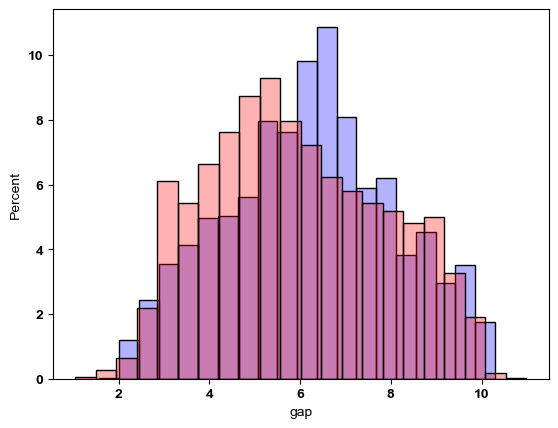

In [5]:
sns.histplot(gen_data['gap'], stat='percent', color='blue', alpha=0.3, bins=20)
sns.histplot(data['gap'], stat='percent', color='red', alpha=0.3, bins=22)

In [6]:
np.mean (gen_data['gap'])

6.221033127229501

In [7]:
gen_data.columns

Index(['MolWt', 'HeavyAtomCount', 'HeavyAtomMolWt', 'NumHAcceptors',
       'NumHDonors', 'NumHeteroatoms', 'NumRotatableBonds',
       'NumValenceElectrons', 'NumAromaticRings', 'NumSaturatedRings',
       'NumAliphaticRings', 'NumRadicalElectrons', 'NumAliphaticCarbocycles',
       'NumAliphaticHeterocycles', 'NumAromaticCarbocycles',
       'NumAromaticHeterocycles', 'NumSaturatedCarbocycles',
       'NumSaturatedHeterocycles', 'Logp', 'TPSA', 'QED', 'gap'],
      dtype='object')

In [8]:
# width of the x and y axis
axis_line_width = 2

In [9]:
print (np.mean (data['NumHAcceptors'],))
print (np.mean (gen_data['NumHAcceptors'],))

2.4296691828215247
2.639791937581274


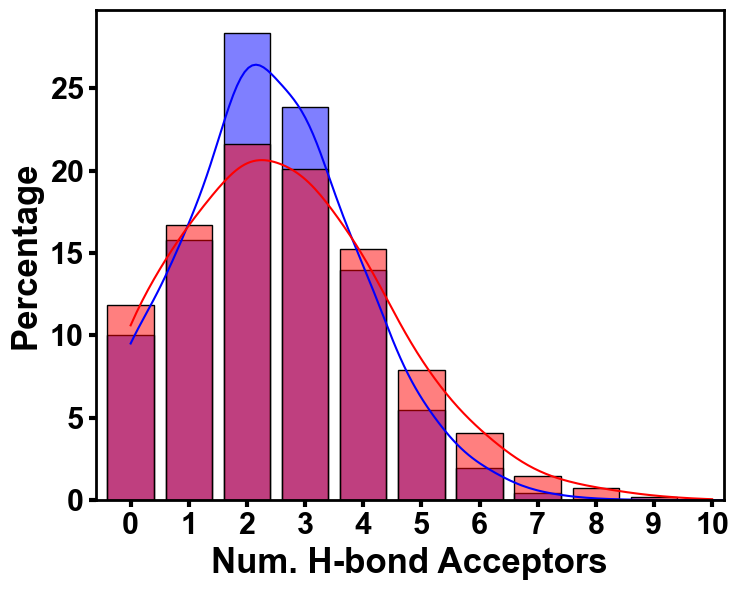

In [10]:
# plot Num.Sat.Rings distribution
plt.close()
fig, ax = plt.subplots(figsize = (7.5, 6))

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.tick_params(axis='x', labelsize=22, width=3, length=5)
ax.tick_params(axis='y', labelsize=22, width=3, length=5)

min_val = int(min(min(gen_data['NumHAcceptors']), min(data['NumHAcceptors'])))
max_val = int(max(max(gen_data['NumHAcceptors']), max(data['NumHAcceptors'])))

kwargs1 = dict(kde_kws={'bw_adjust':4})
kwargs2 = dict(kde_kws={'bw_adjust':2})

sns.histplot(data['NumHAcceptors'], color='blue', stat='percent', shrink=.8, discrete=True, kde=True, alpha=0.5, **kwargs1)
sns.histplot(gen_data['NumHAcceptors'],  color='red', stat='percent', shrink=.8, discrete=True, kde=True, alpha=0.5, **kwargs2)

ax.set_xlabel("Num. H-bond Acceptors", fontsize='25', fontweight='bold', labelpad=5)
ax.set_ylabel('Percentage', fontsize='25', fontweight='bold', labelpad=5)

plt.xlim(-0.6 ,10.2)
plt.xticks(range(11))
[i.set_linewidth(axis_line_width) for i in ax.spines.values()]
plt.tight_layout()
plt.savefig('NumHAcceptors.jpeg', dpi=500, bbox_inches='tight')

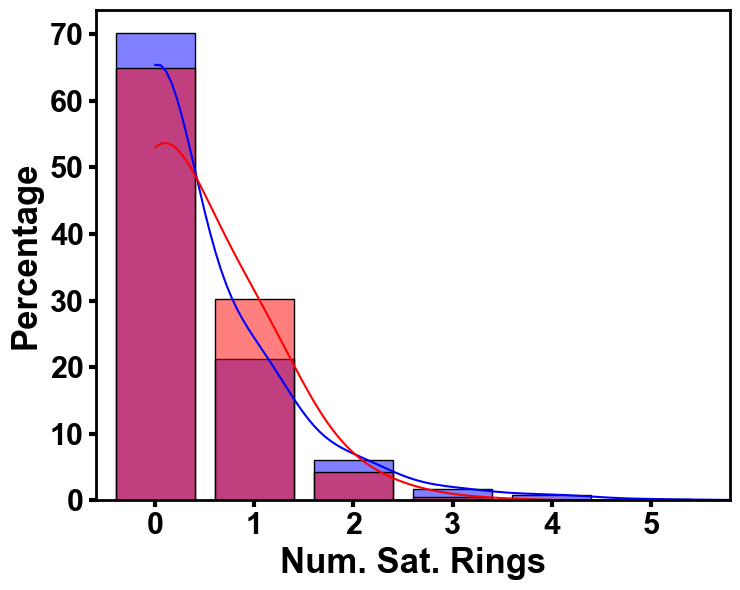

In [12]:
# plot Num.Sat.Rings distribution
plt.close()
fig, ax = plt.subplots(figsize = (7.5, 6))

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.tick_params(axis='x', labelsize=22, width=3, length=5)
ax.tick_params(axis='y', labelsize=22, width=3, length=5)

min_val = int(min(min(gen_data['NumSaturatedRings']), min(data['NumSaturatedRings'])))
max_val = int(max(max(gen_data['NumSaturatedRings']), max(data['NumSaturatedRings'])))

kwargs1 = dict(kde_kws={'bw_adjust':6})
kwargs2 = dict(kde_kws={'bw_adjust':5})

sns.histplot(data['NumSaturatedRings'], color='blue', stat='percent', shrink=.8, discrete=True, kde=True, alpha=0.5, **kwargs1)
sns.histplot(gen_data['NumSaturatedRings'],  color='red', stat='percent', shrink=.8, discrete=True, kde=True, alpha=0.5, **kwargs2)

ax.set_xlabel("Num. Sat. Rings", fontsize='25', fontweight='bold', labelpad=5)
ax.set_ylabel('Percentage', fontsize='25', fontweight='bold', labelpad=5)

plt.xlim(-0.6 ,5.8)
plt.xticks(range(6))
[i.set_linewidth(axis_line_width) for i in ax.spines.values()]
plt.tight_layout()
plt.savefig('NumSaturatedRings.jpeg', dpi=500, bbox_inches='tight')

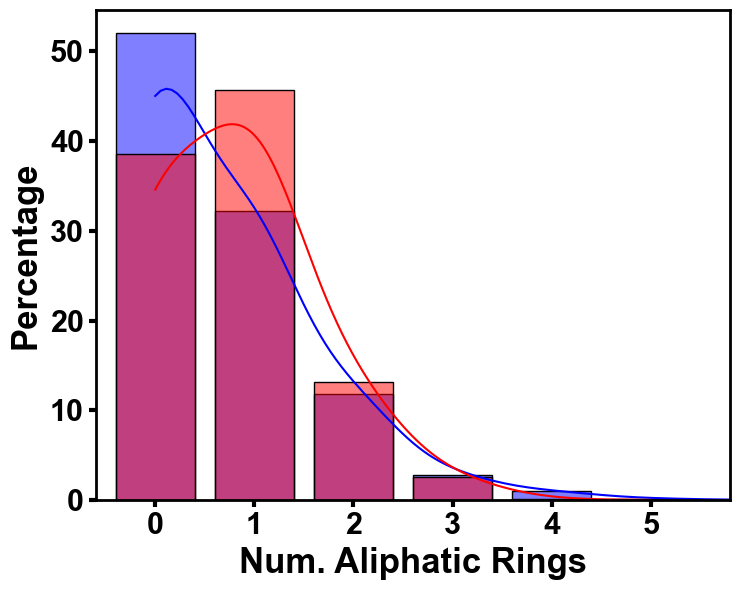

In [13]:
# plot Num.Aliph.Rings distribution
plt.close()
fig, ax = plt.subplots(figsize = (7.5, 6))

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.tick_params(axis='x', labelsize=22, width=3, length=5)
ax.tick_params(axis='y', labelsize=22, width=3, length=5)

min_val = int(min(min(gen_data['NumAliphaticRings']), min(data['NumAliphaticRings'])))
max_val = int(max(max(gen_data['NumAliphaticRings']), max(data['NumAliphaticRings'])))

kwargs1 = dict(kde_kws={'bw_adjust':6})
kwargs2 = dict(kde_kws={'bw_adjust':4})

sns.histplot(data['NumAliphaticRings'], color='blue', stat='percent', shrink=.8, discrete=True, kde=True, alpha=0.5, **kwargs1)
sns.histplot(gen_data['NumAliphaticRings'], color='red', stat='percent', shrink=.8, discrete=True, kde=True, alpha=0.5, **kwargs2)

ax.set_xlabel("Num. Aliphatic Rings", fontsize='25', fontweight='bold', labelpad=5)
ax.set_ylabel('Percentage', fontsize='25', fontweight='bold', labelpad=5)

plt.xlim(-0.6 ,5.8)
plt.xticks(range(6))
[i.set_linewidth(axis_line_width) for i in ax.spines.values()]
plt.tight_layout()
plt.savefig('NumAliphaticRings.jpeg', dpi=500, bbox_inches='tight')

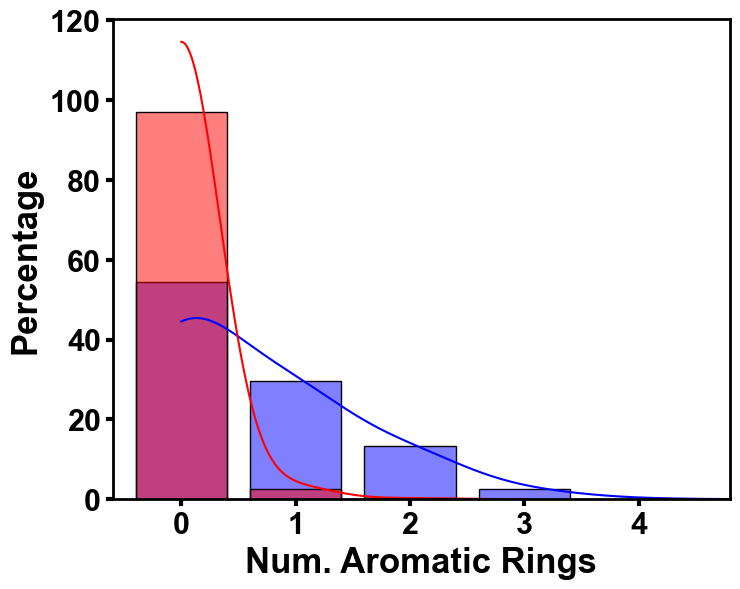

In [13]:
# plot Num.Aliph.Rings distribution
plt.close()
fig, ax = plt.subplots(figsize = (7.5, 6))

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.tick_params(axis='x', labelsize=22, width=3, length=5)
ax.tick_params(axis='y', labelsize=22, width=3, length=5)

min_val = int(min(min(gen_data['NumAromaticRings']), min(data['NumAromaticRings'])))
max_val = int(max(max(gen_data['NumAromaticRings']), max(data['NumAromaticRings'])))


kwargs1 = dict(kde_kws={'bw_adjust':7})
kwargs2 = dict(kde_kws={'bw_adjust':10})

sns.histplot(data['NumAromaticRings'], discrete=True, color='blue', shrink=.8, stat='percent', kde=True, alpha=0.5, **kwargs1)
sns.histplot(gen_data['NumAromaticRings'], discrete=True, color='red', shrink=.8, stat='percent', kde=True, alpha=0.5, **kwargs2)

ax.set_xlabel("Num. Aromatic Rings", fontsize='25', fontweight='bold', labelpad=5)
ax.set_ylabel('Percentage', fontsize='25', fontweight='bold', labelpad=5)
plt.xlim(-0.6 ,4.8)
plt.xticks(range(5))
[i.set_linewidth(axis_line_width) for i in ax.spines.values()]
plt.tight_layout()
plt.savefig('NumAromaticRings.jpeg', dpi=500, bbox_inches='tight')

In [14]:
gen_data.columns

Index(['MolWt', 'HeavyAtomCount', 'HeavyAtomMolWt', 'NumHAcceptors',
       'NumHDonors', 'NumHeteroatoms', 'NumRotatableBonds',
       'NumValenceElectrons', 'NumAromaticRings', 'NumSaturatedRings',
       'NumAliphaticRings', 'NumRadicalElectrons', 'NumAliphaticCarbocycles',
       'NumAliphaticHeterocycles', 'NumAromaticCarbocycles',
       'NumAromaticHeterocycles', 'NumSaturatedCarbocycles',
       'NumSaturatedHeterocycles', 'Logp', 'TPSA', 'QED', 'gap'],
      dtype='object')

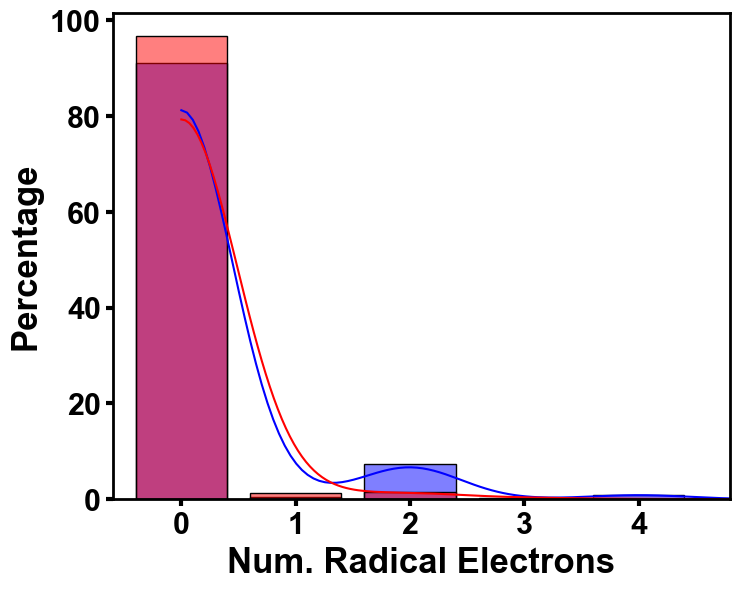

In [15]:
# plot NumRadicalElectrons
plt.close()
fig, ax = plt.subplots(figsize = (7.5, 6))

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.tick_params(axis='x', labelsize=22, width=3, length=5)
ax.tick_params(axis='y', labelsize=22, width=3, length=5)

min_val = int(min(min(gen_data['NumRadicalElectrons']), min(data['NumRadicalElectrons'])))
max_val = int(max(max(gen_data['NumRadicalElectrons']), max(data['NumRadicalElectrons'])))

# make bars narrower
bins = list(range(min_val, max_val+1, ))
bins_width = 0.4
bins = [[b - bins_width, b + bins_width] for b in bins]

bins = np.array (bins).ravel()
kwargs1 = dict(kde_kws={'bw_adjust':7})
kwargs2 = dict(kde_kws={'bw_adjust':8})

sns.histplot(data['NumRadicalElectrons'], discrete=True, color='blue', shrink=.8, stat='percent', kde=True, alpha=0.5, **kwargs1)
sns.histplot(gen_data['NumRadicalElectrons'], discrete=True, color='red', shrink=.8, stat='percent', kde=True, alpha=0.5, **kwargs2)

ax.set_xlabel("Num. Radical Electrons", fontsize='25', fontweight='bold', labelpad=5)
ax.set_ylabel('Percentage', fontsize='25', fontweight='bold', labelpad=5)

plt.xlim(-0.6 ,4.8)
[i.set_linewidth(axis_line_width) for i in ax.spines.values()]
plt.tight_layout()
plt.savefig('NumRadicalElectrons.jpeg', dpi=500, bbox_inches='tight')

In [16]:
gen_data.columns

Index(['MolWt', 'HeavyAtomCount', 'HeavyAtomMolWt', 'NumHAcceptors',
       'NumHDonors', 'NumHeteroatoms', 'NumRotatableBonds',
       'NumValenceElectrons', 'NumAromaticRings', 'NumSaturatedRings',
       'NumAliphaticRings', 'NumRadicalElectrons', 'NumAliphaticCarbocycles',
       'NumAliphaticHeterocycles', 'NumAromaticCarbocycles',
       'NumAromaticHeterocycles', 'NumSaturatedCarbocycles',
       'NumSaturatedHeterocycles', 'Logp', 'TPSA', 'QED', 'gap'],
      dtype='object')

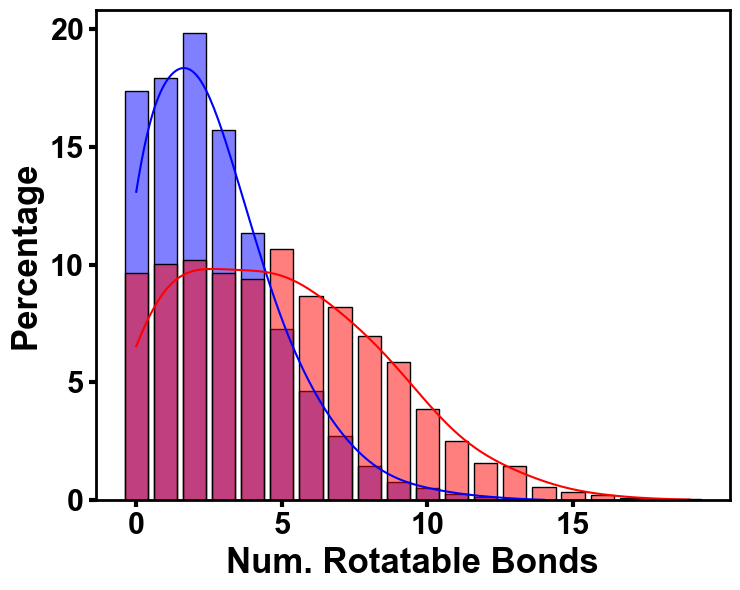

In [17]:
# plot NumRotatableBonds
plt.close()
fig, ax = plt.subplots(figsize = (7.5, 6))

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.tick_params(axis='x', labelsize=22, width=3, length=5)
ax.tick_params(axis='y', labelsize=22, width=3, length=5)

min_val = int(min(min(gen_data['NumRotatableBonds']), min(data['NumRotatableBonds'])))
max_val = int(max(max(gen_data['NumRotatableBonds']), max(data['NumRotatableBonds'])))

# make bars narrower
bins = list(range(min_val, max_val+1, ))
bins_width = 0.4
bins = [[b - bins_width, b + bins_width] for b in bins]

bins = np.array (bins).ravel()
kwargs1 = dict(kde_kws={'bw_adjust':4})
kwargs2 = dict(kde_kws={'bw_adjust':2})

sns.histplot(data['NumRotatableBonds'], bins=bins, color='blue', stat='percent', discrete=True, shrink=0.8, kde=True, alpha=0.5, **kwargs1)
sns.histplot(gen_data['NumRotatableBonds'],  bins=bins, color='red', stat='percent', discrete=True, shrink=0.8, kde=True, alpha=0.5, **kwargs2)

ax.set_xlabel("Num. Rotatable Bonds", fontsize='25', fontweight='bold', labelpad=5)
ax.set_ylabel('Percentage', fontsize='25', fontweight='bold', labelpad=5)

#plt.xlim(-0.6 ,4.8)
plt.xticks(range(0, 16, 5))
[i.set_linewidth(axis_line_width) for i in ax.spines.values()]
plt.tight_layout()
plt.savefig('NumRotatableBonds.jpeg', dpi=500, bbox_inches='tight')

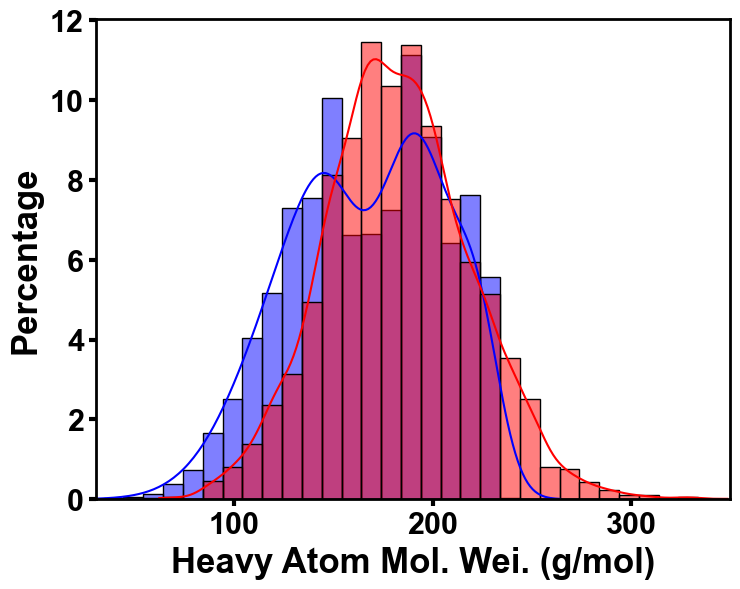

In [18]:
# plot HeavyAtomMolWt
plt.close()
fig, ax = plt.subplots(figsize = (7.5, 6))

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.tick_params(axis='x', labelsize=22, width=3, length=5)
ax.tick_params(axis='y', labelsize=22, width=3, length=5)

min_val = int(min(min(gen_data['HeavyAtomMolWt']), min(data['HeavyAtomMolWt'])))
max_val = int(max(max(gen_data['HeavyAtomMolWt']), max(data['HeavyAtomMolWt'])))

# make bars narrower
bins = list(range(min_val, max_val+1, 10))
bins_width = 0.4
#bins = [[b - bins_width, b + bins_width] for b in bins]

#bins = np.array (bins).ravel()
kwargs1 = dict(kde_kws={'bw_adjust':3})
kwargs2 = dict(kde_kws={'bw_adjust':1})

sns_ = sns.histplot(data['HeavyAtomMolWt'], bins=bins, color='blue', stat='percent', kde=True, alpha=0.5, **kwargs1)
sns.histplot(gen_data['HeavyAtomMolWt'],  bins=bins, color='red', stat='percent', kde=True, alpha=0.5, **kwargs2)

ax.set_xlabel("Heavy Atom Mol. Wei. (g/mol)", fontsize='25', fontweight='bold', labelpad=5)
ax.set_ylabel('Percentage', fontsize='25', fontweight='bold', labelpad=5)

plt.xlim(30 , 350)
[i.set_linewidth(axis_line_width) for i in ax.spines.values()]
plt.tight_layout()
plt.savefig('HeavyAtomMolWt.jpeg', dpi=500, bbox_inches='tight')

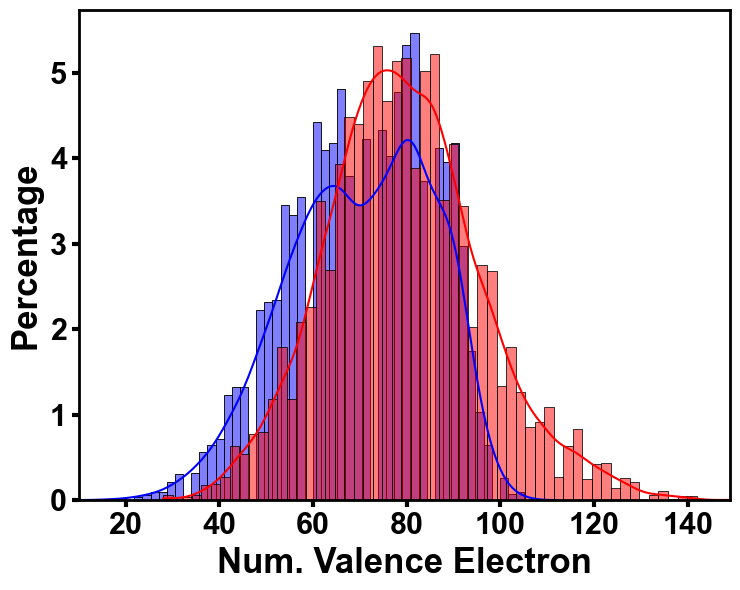

In [19]:
# plot NumValenceElectrons
plt.close()
fig, ax = plt.subplots(figsize = (7.5, 6))

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.tick_params(axis='x', labelsize=22, width=3, length=5)
ax.tick_params(axis='y', labelsize=22, width=3, length=5)

min_val = int(min(min(gen_data['NumValenceElectrons']), min(data['NumValenceElectrons'])))
max_val = int(max(max(gen_data['NumValenceElectrons']), max(data['NumValenceElectrons'])))
kwargs1 = dict(kde_kws={'bw_adjust':2})
kwargs2 = dict(kde_kws={'bw_adjust':1})

sns.histplot(data['NumValenceElectrons'], bins=60, color='blue', stat='percent', kde=True, alpha=0.5, **kwargs1)
sns.histplot(gen_data['NumValenceElectrons'],  bins=60, color='red', stat='percent', kde=True, alpha=0.5, **kwargs2)

ax.set_xlabel("Num. Valence Electron", fontsize='25', fontweight='bold', labelpad=5)
ax.set_ylabel('Percentage', fontsize='25', fontweight='bold', labelpad=5)

plt.xlim(10, 149)
[i.set_linewidth(axis_line_width) for i in ax.spines.values()]
plt.tight_layout()
plt.savefig('NumValenceElectrons.jpeg', dpi=500, bbox_inches='tight')

(array([5.973e+03, 1.630e+02, 1.400e+01, 2.000e+00]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5]),
 <BarContainer object of 4 artists>)

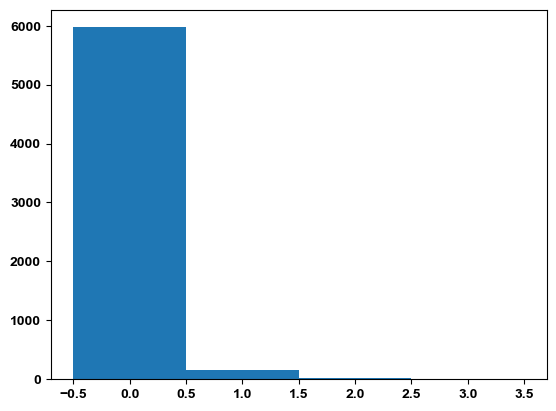

In [20]:
plt.hist(gen_data['NumAromaticRings'], bins=[-0.5, 0.5, 1.5 ,2.5, 3.5])

In [21]:
bad_mw = data.loc[data['MolWt']<182].loc[data['MolWt']>172].index.to_list()

len(bad_mw)


6352

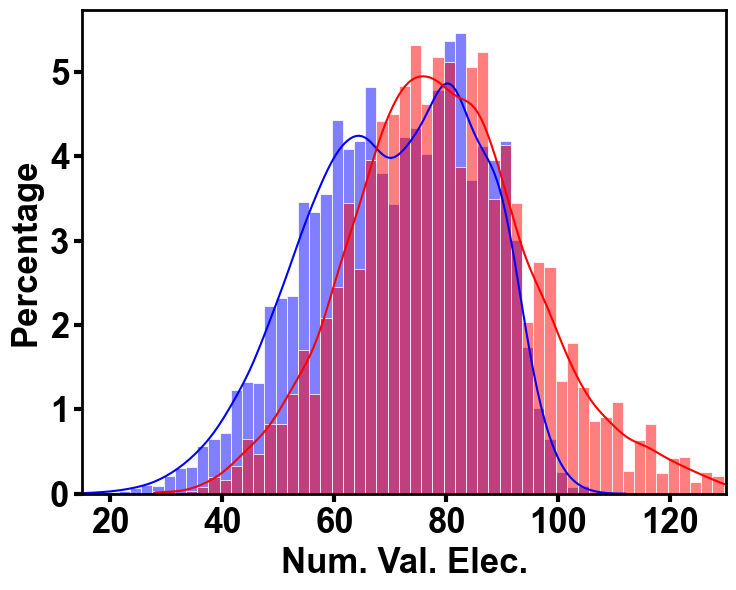

In [22]:
# plot Molw distribution
#data = data.loc [data['NumValenceElectrons']>75]

plt.close()
fig, ax = plt.subplots(figsize = (7.5, 6))

# Hide the right and top spines
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
#ax.spines['left'].set_visible(False)
# Only show ticks on the left and bottom spines
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.tick_params(axis='x', labelsize=18, width=4)
ax.tick_params(axis='y', labelsize=18, width=4)


min_val = int(min(min(gen_data['NumValenceElectrons']), min(data['NumValenceElectrons'])))
max_val = int(max(max(gen_data['NumValenceElectrons']), max(data['NumValenceElectrons'])))

bins = list(range(min_val, max_val+2, 2))
bins = [b-0.5 for b in bins]

kwargs1 = dict(kde_kws={'bw_adjust':2})
kwargs2 = dict(kde_kws={'bw_adjust':1})

"""
sns.histplot(data['NumValenceElectrons'], bins=bins, kde=True, #**kwargs1, 
             color='blue', stat='density', alpha=0.4)
bins2 = [i+1 for i in bins]
sns.histplot(gen_data['NumValenceElectrons'], bins=bins2, kde=True, 
             color='red', #**kwargs2, 
             stat='density', alpha=0.4)
"""
sns.set_style("white")
sns.histplot(data['NumValenceElectrons'], bins=bins, color='blue', stat='percent', kde=True, **kwargs1)
sns.histplot(gen_data['NumValenceElectrons'], bins=bins, color='red', stat='percent', kde=True, **kwargs2)

ax.set_xlabel("Num. Val. Elec.", fontsize='25', fontweight='bold', labelpad=5)
ax.set_ylabel('Percentage', fontsize='25', fontweight='bold', labelpad=5)

plt.xlim(15, 130)
handles, labels = plt.gca().get_legend_handles_labels()
#my_artist = plt.Line2D((0,1),(0,0), color = "blue", linestyle = "-", linewidth = 1)
my_artist = plt.Rectangle((0, 0), 1, 1, fc="b")
p = plt.Rectangle((0, 0), 1, 1, fc="r")
[i.set_linewidth(axis_line_width) for i in ax.spines.values()]
ax.tick_params(axis='both', length=6, width=3, colors='black', grid_alpha=0, labelsize='25') 
#plt.yticks([0.01, 0.07, 0.12, 0.17])


#plt.legend(labels = ['qm9','generated Smiles'], loc='lower right', bbox_to_anchor=(0.2,1))
plt.tight_layout()
plt.savefig('NumValenceElectrons.jpeg', dpi=500, bbox_inches='tight')


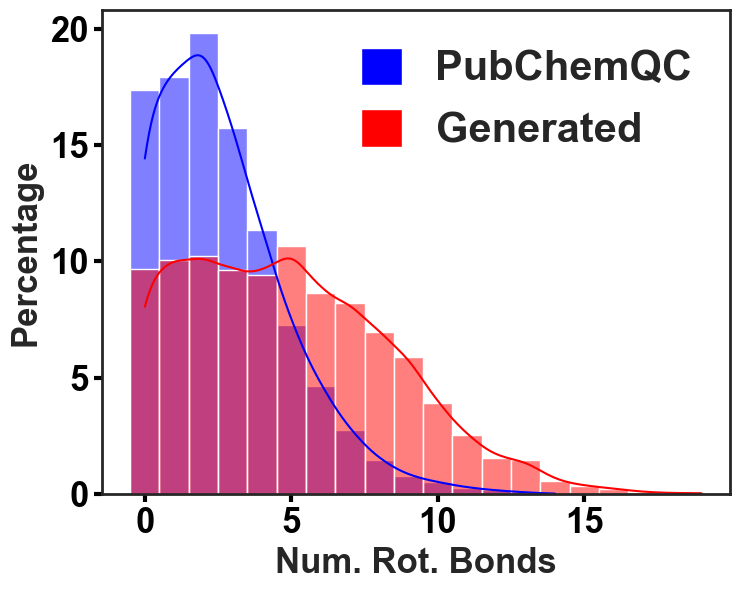

In [23]:
# plot Molw distribution
#data = data.loc [data['NumRotatableBonds']>75]

plt.close()
fig, ax = plt.subplots(figsize = (7.5, 6))

# Hide the right and top spines
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
#ax.spines['left'].set_visible(False)
# Only show ticks on the left and bottom spines
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.tick_params(axis='x', labelsize=22, width=4)
ax.tick_params(axis='y', labelsize=22, width=4)


min_val = int(min(min(gen_data['NumRotatableBonds']), min(data['NumRotatableBonds'])))
max_val = int(max(max(gen_data['NumRotatableBonds']), max(data['NumRotatableBonds'])))

bins = list(range(min_val, max_val+1, ))
bins = [b-0.5 for b in bins]

kwargs1 = dict(hist_kws={'alpha':0.5, 'rwidth':1}, kde_kws={'linewidth':1, 'bw_adjust':2.9})
kwargs2 = dict(hist_kws={'alpha':0.5, 'rwidth':1}, kde_kws={'linewidth':1, 'bw_adjust':1.1})

kwargs1 = dict(kde_kws={'bw_adjust':3})
kwargs2 = dict(kde_kws={'bw_adjust':1})
"""
sns.histplot(data['NumRotatableBonds'], bins=bins, kde=True, #**kwargs1, 
             color='blue', stat='density', alpha=0.4)
bins2 = [i+1 for i in bins]
sns.histplot(gen_data['NumRotatableBonds'], bins=bins2, kde=True, 
             color='red', #**kwargs2, 
             stat='density', alpha=0.4)
"""
sns.set_style("white")
sns.histplot(data['NumRotatableBonds'], bins=bins, color='blue', stat='percent', kde=True, **kwargs1)
sns.histplot(gen_data['NumRotatableBonds'], bins=bins, color='red', stat='percent', kde=True, **kwargs2)

ax.set_xlabel("Num. Rot. Bonds", fontsize='25', fontweight='bold', labelpad=5)
ax.set_ylabel('Percentage', fontsize='25', fontweight='bold', labelpad=5)


handles, labels = plt.gca().get_legend_handles_labels()
#my_artist = plt.Line2D((0,1),(0,0), color = "blue", linestyle = "-", linewidth = 1)
my_artist = plt.Rectangle((0, 0), 1, 1, fc="b")
p = plt.Rectangle((0, 0), 1, 1, fc="r")
[i.set_linewidth(axis_line_width) for i in ax.spines.values()]
ax.tick_params(axis='both', length=6, width=3, colors='black', grid_alpha=0, labelsize='25') 
#plt.yticks([0.01, 0.07, 0.12, 0.17])

plt.legend([handle for i,handle in enumerate(handles) if i in display]+[my_artist, p],
           [label for i,label in enumerate(labels) if i in display]+["PubChemQC", "Generated"], fontsize=30,
           handlelength=1, handleheight=1, frameon=False)

plt.tight_layout()
plt.savefig('NumRotatableBonds.jpeg', dpi=500, bbox_inches='tight')


In [24]:
gen_data.shape

(6152, 22)

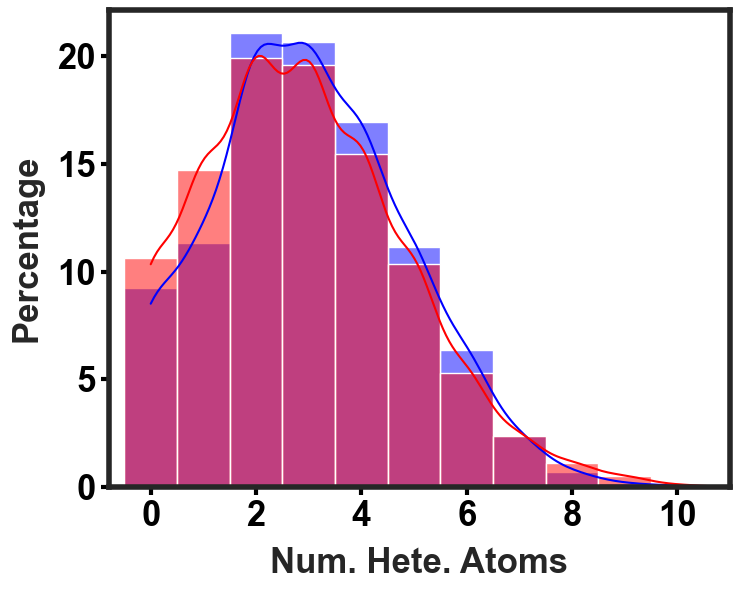

In [25]:
# plot Molw distribution
#data = data.loc [data['NumHeteroatoms']>75]

plt.close()
fig, ax = plt.subplots(figsize = (7.5, 6))

# Hide the right and top spines
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
#ax.spines['left'].set_visible(False)
# Only show ticks on the left and bottom spines
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.tick_params(axis='x', labelsize=18, width=4)
ax.tick_params(axis='y', labelsize=18, width=4)


min_val = int(min(min(gen_data['NumHeteroatoms']), min(data['NumHeteroatoms'])))
max_val = int(max(max(gen_data['NumHeteroatoms']), max(data['NumHeteroatoms'])))

bins = list(range(min_val, max_val+2))
bins = [b-0.5 for b in bins]

kwargs1 = dict(hist_kws={'alpha':0.5, 'rwidth':1}, kde_kws={'linewidth':1, 'bw_adjust':2.5})
kwargs2 = dict(hist_kws={'alpha':0.5, 'rwidth':1}, kde_kws={'linewidth':1, 'bw_adjust':1.0})

"""
sns.histplot(data['NumHeteroatoms'], bins=bins, kde=True, #**kwargs1, 
             color='blue', stat='density', alpha=0.4)
bins2 = [i+1 for i in bins]
sns.histplot(gen_data['NumHeteroatoms'], bins=bins2, kde=True, 
             color='red', #**kwargs2, 
             stat='density', alpha=0.4)
"""
kwargs1 = dict(kde_kws={'bw_adjust':3})
kwargs2 = dict(kde_kws={'bw_adjust':1.4})

sns.set_style("white")
sns.histplot(data['NumHeteroatoms'], bins=bins, color='blue', stat='percent', kde=True, **kwargs1)
sns.histplot(gen_data['NumHeteroatoms'], bins=bins, color='red',stat='percent', kde=True, **kwargs2)

ax.set_xlabel("Num. Hete. Atoms", fontsize='25', fontweight='bold', labelpad=10)
ax.set_ylabel('Percentage', fontsize='25', fontweight='bold', labelpad=10)

plt.xlim(-0.8, 11)
plt.xticks(range(0, 11, 2))
handles, labels = plt.gca().get_legend_handles_labels()
#my_artist = plt.Line2D((0,1),(0,0), color = "blue", linestyle = "-", linewidth = 1)
my_artist = plt.Rectangle((0, 0), 1, 1, fc="b")
p = plt.Rectangle((0, 0), 1, 1, fc="r")
[i.set_linewidth(4) for i in ax.spines.values()]
ax.tick_params(axis='both', length=6, width=3, colors='black', grid_alpha=0, labelsize='25') 
#plt.yticks([0, 0.2, 0.4])

"""
plt.plot([np.mean(data['NumHeteroatoms']), np.mean(data['NumHeteroatoms'])], [0, 0.1], 
         linestyle='--', c='blue', linewidth=3)
plt.plot([np.mean(gen_data['NumHeteroatoms']), np.mean(gen_data['NumHeteroatoms'])], [0, 0.1], 
         linestyle='--', c='red', linewidth=3)
"""

"""
plt.legend([handle for i,handle in enumerate(handles) if i in display]+[my_artist, p],
           [label for i,label in enumerate(labels) if i in display]+["QM9", "Generated"], 
           handlelength=0.8, handleheight=0.8, frameon=False)
"""

#plt.legend(labels = ['qm9','generated Smiles'], loc='lower right', bbox_to_anchor=(0.2,1))
plt.tight_layout()
plt.savefig('NumHeteroatoms.jpeg', dpi=500, bbox_inches='tight')

/tmp/ipykernel_3395193/455558275.py:37: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['NumHeteroatoms'], bins=bins, color='blue', **kwargs1)
/tmp/ipykernel_3395193/455558275.py:38: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gen_data['NumHeteroatoms'], bins=bins, color='red', **kwargs2)


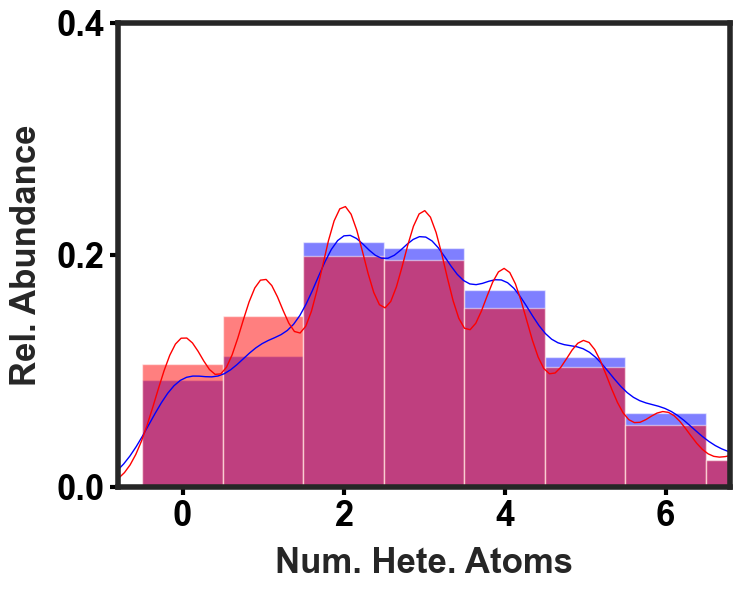

In [26]:
# plot Molw distribution
#data = data.loc [data['NumHeteroatoms']>75]

plt.close()
fig, ax = plt.subplots(figsize = (7.5, 6))

# Hide the right and top spines
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
#ax.spines['left'].set_visible(False)
# Only show ticks on the left and bottom spines
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.tick_params(axis='x', labelsize=18, width=4)
ax.tick_params(axis='y', labelsize=18, width=4)


min_val = int(min(min(gen_data['NumHeteroatoms']), min(data['NumHeteroatoms'])))
max_val = int(max(max(gen_data['NumHeteroatoms']), max(data['NumHeteroatoms'])))

bins = list(range(min_val, max_val+2))
bins = [b-0.5 for b in bins]

kwargs1 = dict(hist_kws={'alpha':0.5, 'rwidth':1}, kde_kws={'linewidth':1, 'bw_adjust':2.5})
kwargs2 = dict(hist_kws={'alpha':0.5, 'rwidth':1}, kde_kws={'linewidth':1, 'bw_adjust':1.0})

"""
sns.histplot(data['NumHeteroatoms'], bins=bins, kde=True, #**kwargs1, 
             color='blue', stat='density', alpha=0.4)
bins2 = [i+1 for i in bins]
sns.histplot(gen_data['NumHeteroatoms'], bins=bins2, kde=True, 
             color='red', #**kwargs2, 
             stat='density', alpha=0.4)
"""
sns.set_style("white")
sns.distplot(data['NumHeteroatoms'], bins=bins, color='blue', **kwargs1)
sns.distplot(gen_data['NumHeteroatoms'], bins=bins, color='red', **kwargs2)

ax.set_xlabel("Num. Hete. Atoms", fontsize='25', fontweight='bold', labelpad=10)
ax.set_ylabel('Rel. Abundance', fontsize='25', fontweight='bold', labelpad=10)

plt.xlim(-0.8, 6.8)
handles, labels = plt.gca().get_legend_handles_labels()
#my_artist = plt.Line2D((0,1),(0,0), color = "blue", linestyle = "-", linewidth = 1)
my_artist = plt.Rectangle((0, 0), 1, 1, fc="b")
p = plt.Rectangle((0, 0), 1, 1, fc="r")
[i.set_linewidth(4) for i in ax.spines.values()]
ax.tick_params(axis='both', length=6, width=3, colors='black', grid_alpha=0, labelsize='25') 
plt.yticks([0, 0.2, 0.4])

"""
plt.plot([np.mean(data['NumHeteroatoms']), np.mean(data['NumHeteroatoms'])], [0, 0.1], 
         linestyle='--', c='blue', linewidth=3)
plt.plot([np.mean(gen_data['NumHeteroatoms']), np.mean(gen_data['NumHeteroatoms'])], [0, 0.1], 
         linestyle='--', c='red', linewidth=3)
"""

"""
plt.legend([handle for i,handle in enumerate(handles) if i in display]+[my_artist, p],
           [label for i,label in enumerate(labels) if i in display]+["QM9", "Generated"], 
           handlelength=0.8, handleheight=0.8, frameon=False)
"""

#plt.legend(labels = ['qm9','generated Smiles'], loc='lower right', bbox_to_anchor=(0.2,1))
plt.tight_layout()
plt.savefig('NumHeteroatoms.jpeg', dpi=500, bbox_inches='tight')

/tmp/ipykernel_3395193/2504259841.py:23: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.array(data['NumHAcceptors']),
/tmp/ipykernel_3395193/2504259841.py:25: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.array(gen_data['NumHAcceptors']),


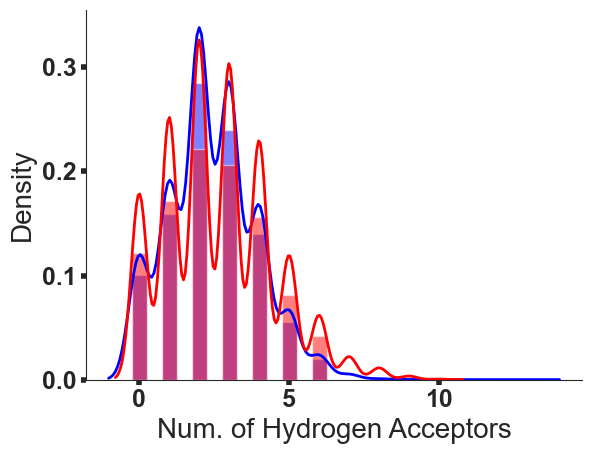

In [27]:
# plot Molw distribution
#data = data.loc [data['MolWt']>75]

plt.close()
fig, ax = plt.subplots()

mpl.rcParams['axes.linewidth'] = 2.5
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.spines['left'].set_visible(False)
# Only show ticks on the left and bottom spines
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.tick_params(axis='x', labelsize=18, width=4)
ax.tick_params(axis='y', labelsize=18, width=4)

kwargs = dict(hist_kws={'alpha':0.5, 'rwidth':0.5}, kde_kws={'linewidth':2, 'bw_adjust':2.5})
kwargs2 = dict(hist_kws={'alpha':0.5, 'rwidth':0.5}, kde_kws={'linewidth':2, 'bw_adjust':0.85})

sns.set_style("white")
sns.distplot(np.array(data['NumHAcceptors']), 
             color='blue', bins=[-0.5, 0.5,1.5,2.5,3.5,4.5,5.5,6.5],**kwargs)
sns.distplot(np.array(gen_data['NumHAcceptors']), 
             color='red', bins=[-0.5, 0.5,1.5,2.5,3.5,4.5,5.5,6.5], **kwargs2)


plt.xlabel("Num. of Hydrogen Acceptors", fontsize=20)
plt.ylabel("Density", fontsize=20)

handles, labels = plt.gca().get_legend_handles_labels()
#my_artist = plt.Line2D((0,1),(0,0), color = "blue", linestyle = "-", linewidth = 1)
my_artist = plt.Rectangle((0, 0), 1, 1, fc="b")
p = plt.Rectangle((0, 0), 1, 1, fc="r")
"""
plt.legend([handle for i,handle in enumerate(handles) if i in display]+[my_artist, p],
           [label for i,label in enumerate(labels) if i in display]+["QM9", "Generated"], 
           handlelength=0.8, handleheight=0.8, frameon=False)
"""

#plt.legend(labels = ['qm9','generated Smiles'], loc='lower right', bbox_to_anchor=(0.2,1))
plt.savefig('numHydAcc.jpeg', dpi=500, bbox_inches='tight')


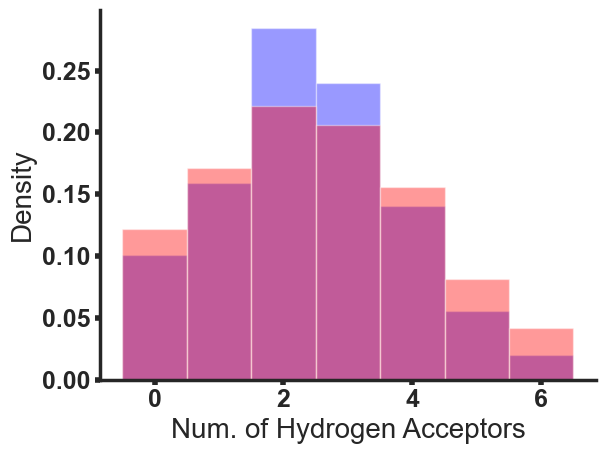

In [28]:
# plot Molw distribution
#data = data.loc [data['MolWt']>75]

plt.close()
fig, ax = plt.subplots()

mpl.rcParams['axes.linewidth'] = 2.5
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.spines['left'].set_visible(False)
# Only show ticks on the left and bottom spines
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.tick_params(axis='x', labelsize=18, width=4)
ax.tick_params(axis='y', labelsize=18, width=4)

#sns.set_style("white")
#sns.distplot(data['NumHAcceptors'], color='blue')
#sns.distplot(gen_data['NumHAcceptors'], color='red')
#histtype='barstacked'
qm9_hist = plt.hist(data['NumHAcceptors'], color='blue', histtype='bar',
         density=True, bins=[-0.5, 0.5,1.5,2.5,3.5,4.5,5.5,6.5], alpha=0.4)
gen_hist = plt.hist(gen_data['NumHAcceptors'], color='red', histtype='bar', 
         density=True, bins=[-0.5, 0.5,1.5,2.5,3.5,4.5,5.5,6.5], alpha=0.4)

plt.xlabel("Num. of Hydrogen Acceptors", fontsize=20)
plt.ylabel("Density", fontsize=20)
#xlim(70, 170)
handles, labels = plt.gca().get_legend_handles_labels()
#my_artist = plt.Line2D((0,1),(0,0), color = "blue", linestyle = "-", linewidth = 1)
my_artist = plt.Rectangle((0, 0), 1, 1, fc="b")
p = plt.Rectangle((0, 0), 1, 1, fc="r")

#plt.legend(labels = ['qm9','generated Smiles'], loc='lower right', bbox_to_anchor=(0.2,1))
plt.savefig('numHydAcc_plthist.jpeg', dpi=500, bbox_inches='tight')

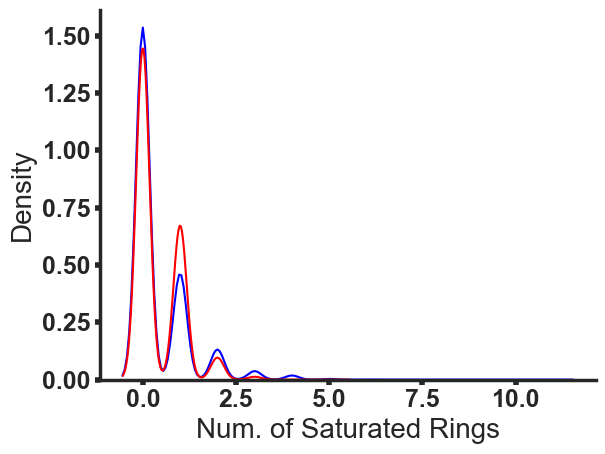

In [29]:
# plot Molw distribution
#data = data.loc [data['MolWt']>75]
plt.close()
fig, ax = plt.subplots()

mpl.rcParams['axes.linewidth'] = 2.5
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.spines['left'].set_visible(False)
# Only show ticks on the left and bottom spines
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.tick_params(axis='x', labelsize=18, width=4)
ax.tick_params(axis='y', labelsize=18, width=4)

sns.set_style("white")
sns.kdeplot(np.array(data['NumSaturatedRings']), color='blue', bw_adjust=2.5)
sns.kdeplot(np.array(gen_data['NumSaturatedRings']), color='red', bw_adjust=1.7)


plt.xlabel("Num. of Saturated Rings", fontsize=20)
plt.ylabel("Density", fontsize=20)

handles, labels = plt.gca().get_legend_handles_labels()
#my_artist = plt.Line2D((0,1),(0,0), color = "blue", linestyle = "-", linewidth = 1)
my_artist = plt.Rectangle((0, 0), 1, 1, fc="b")
p = plt.Rectangle((0, 0), 1, 1, fc="r")
"""
plt.legend([handle for i,handle in enumerate(handles) if i in display]+[my_artist, p],
           [label for i,label in enumerate(labels) if i in display]+["QM9", "Generated"], 
           handlelength=0.8, handleheight=0.8, frameon=False)
"""

#plt.legend(labels = ['qm9','generated Smiles'], loc='lower right', bbox_to_anchor=(0.2,1))
plt.savefig('numHydAcc.jpeg', dpi=500, bbox_inches='tight')

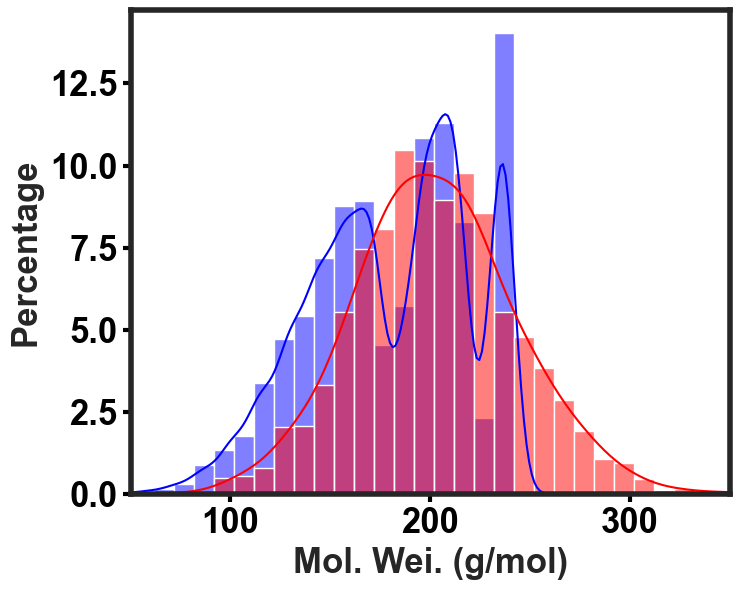

In [30]:
# plot Molw distribution
#data = data.loc [data['MolWt']>75]

plt.close()
fig, ax = plt.subplots(figsize = (7.5, 6))

# Hide the right and top spines
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
#ax.spines['left'].set_visible(False)
# Only show ticks on the left and bottom spines
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.tick_params(axis='x', labelsize=18, width=4)
ax.tick_params(axis='y', labelsize=18, width=4)


min_val = int(min(min(gen_data['MolWt']), min(data['MolWt'])))
max_val = int(max(max(gen_data['MolWt']), max(data['MolWt'])))

bins = list(range(min_val, max_val, 10))
bins = [b-10*0.5 for b in bins]

kwargs1 = dict(kde_kws={'bw_adjust':1.5})
kwargs2 = dict(kde_kws={'bw_adjust':1.5})

sns.histplot(data['MolWt'], bins=bins, color='blue', stat='percent', kde=True, **kwargs1)
sns.histplot(gen_data['MolWt'], bins=bins, color='red', stat='percent', alpha=0.5, kde=True, **kwargs2)

ax.set_xlabel("Mol. Wei. (g/mol)", fontsize='25', fontweight='bold', labelpad=5)
ax.set_ylabel('Percentage', fontsize='25', fontweight='bold', labelpad=5)

plt.xlim(50, 350)
handles, labels = plt.gca().get_legend_handles_labels()
#my_artist = plt.Line2D((0,1),(0,0), color = "blue", linestyle = "-", linewidth = 1)
my_artist = plt.Rectangle((0, 0), 1, 1, fc="b")
p = plt.Rectangle((0, 0), 1, 1, fc="r")
[i.set_linewidth(4) for i in ax.spines.values()]
ax.tick_params(axis='both', length=6, width=3, colors='black', grid_alpha=0, labelsize='25') 
#plt.yticks([0.01, 0.04, 0.07, 0.1])

"""
plt.plot([np.mean(data['MolWt']), np.mean(data['MolWt'])], [0, 0.1], 
         linestyle='--', c='blue', linewidth=3)
plt.plot([np.mean(gen_data['MolWt']), np.mean(gen_data['MolWt'])], [0, 0.1], 
         linestyle='--', c='red', linewidth=3)
"""

"""
plt.legend([handle for i,handle in enumerate(handles) if i in display]+[my_artist, p],
           [label for i,label in enumerate(labels) if i in display]+["QM9", "Generated"], 
           handlelength=0.8, handleheight=0.8, frameon=False)
"""

#plt.legend(labels = ['qm9','generated Smiles'], loc='lower right', bbox_to_anchor=(0.2,1))
plt.tight_layout()
plt.savefig('MolWt.jpeg', dpi=500, bbox_inches='tight')

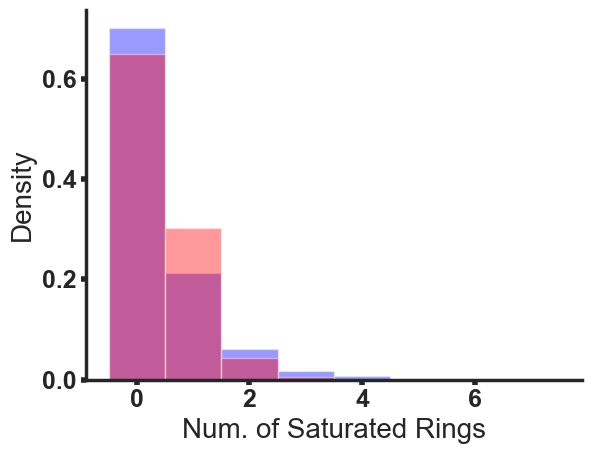

In [31]:
# plot Molw distribution
#data = data.loc [data['MolWt']>75]

plt.close()
fig, ax = plt.subplots()

mpl.rcParams['axes.linewidth'] = 2.5
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.spines['left'].set_visible(False)
# Only show ticks on the left and bottom spines
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.tick_params(axis='x', labelsize=18, width=4)
ax.tick_params(axis='y', labelsize=18, width=4)

#sns.set_style("white")
#sns.distplot(data['NumHAcceptors'], color='blue')
#sns.distplot(gen_data['NumHAcceptors'], color='red')
#histtype='barstacked'
qm9_hist = plt.hist(data['NumSaturatedRings'], color='blue', histtype='bar',
         density=True, bins=[-0.5, 0.5,1.5,2.5,3.5,4.5,5.5,6.5, 7.5], alpha=0.4)
gen_hist = plt.hist(gen_data['NumSaturatedRings'], color='red', histtype='bar', 
         density=True, bins=[-0.5, 0.5,1.5,2.5,3.5,4.5,5.5,6.5, 7.5], alpha=0.4)

plt.xlabel("Num. of Saturated Rings", fontsize=20)
plt.ylabel("Density", fontsize=20)
#xlim(70, 170)
handles, labels = plt.gca().get_legend_handles_labels()
#my_artist = plt.Line2D((0,1),(0,0), color = "blue", linestyle = "-", linewidth = 1)
my_artist = plt.Rectangle((0, 0), 1, 1, fc="b")
p = plt.Rectangle((0, 0), 1, 1, fc="r")
"""
plt.legend([handle for i,handle in enumerate(handles) if i in display]+[my_artist, p],
           [label for i,label in enumerate(labels) if i in display]+["QM9", "Generated"], 
           handlelength=0.8, handleheight=0.8, frameon=False)
"""

#plt.legend(labels = ['qm9','generated Smiles'], loc='lower right', bbox_to_anchor=(0.2,1))
plt.savefig('numHydAcc_plthist.jpeg', dpi=500, bbox_inches='tight')